# coreference resolution

## definition

coreference resolution: identity **all the mentions and clusters** that refer to the same entity in the text. useful for language understanding and information extraction

- mention: a specific type of reference used in coreference resolution to represent an entity in a text, can be a word or a phrase, 

    - 代词 pronouns: I, you, she, he, it
    
    - 专有名词 proper nouns: named entities, people, place
    
    - 名词词组 noun phrases: a cat, the book at shelf

- reference: a general term that can refer to any expression that points to an entity in a text. types of reference are

    - endophora 内指:  refer to entities within the same discourse.

        - anaphora 回指: "John went to the store, and he bought some groceries," "he" is an anaphoric reference to "John."
        - cataphora 后指: "When he arrived at the store, John realized he had forgotten his wallet," "he" is a cataphoric reference to "John."

    - exophora 外指:  "This is delicious," "this" is an exophoric reference, refers to something outside the text (e.g., a dish the speaker is currently eating).


## mention detection

traditional pipeline: detect mentions by different models

- pronoun: POS tagger

- proper noun: NER tagger

- noun phrase: constituency parser

issue: over-generates mentions (singleton mention, e.g., **It** is sunny)

solution: end-to-end coreference resolution model that don't do mention detection explicitly

## coreference resolution model

- Rule-based Models (1990s - early 2000s): Hobbs’ naive algorithm, Winograd Schema. BBN Identifinder and the MUC-6 and MUC-7

- Machine Learning-based Models (late 2000s - early 2010s): binary classification of Mention Pairs (1: coreferent, 0: otherwise). ACE (Automatic Content Extraction) and OntoNotes datasets (2006-2013)

- Mention-Ranking Models (early 2010s): candidate antecedents are ranked based on their likelihood

- Cluster-Ranking Models (mid 2010s): clusters of coreferent mentions are ranked. Stanford Deterministic Coreference Resolution system

- neural (late 2010s - present): 

    - RNN with attention. End-to-end system developed by Lee et al. in 2017.

    - Transformer-based: SpanBERT designed for tasks that consider spans



### ML model

features: agreement, sementic compatibility, syntactic constraints, distance, prefer subject, parallelism.

task: for each mention, predict one antecedent mention. the candidate antecedent with highest score (probability) will be the final matched mention. can have dummy NA mention (singleton mention)


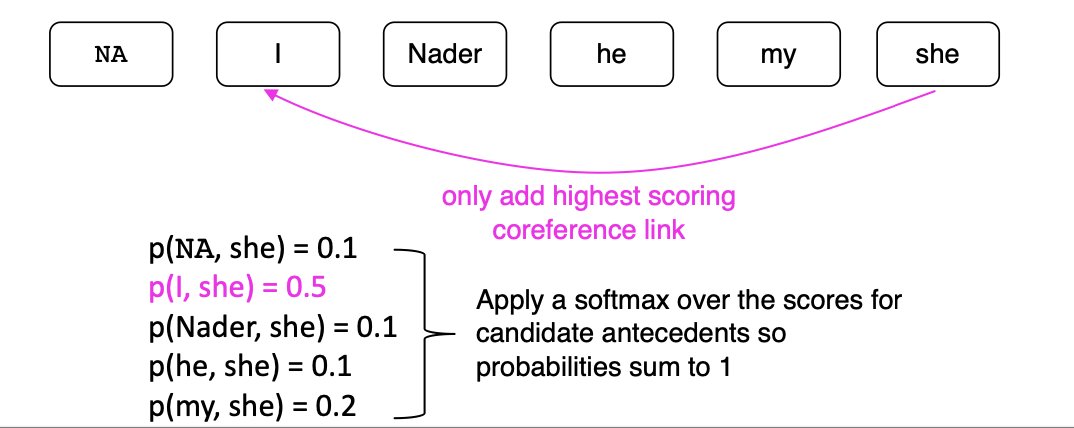

### neural

FFNN Clark and Manning 2016

- input: word embeddings of mention (previous words, head word, first word, last word) and categorical features (distance, document genre, speaker information)

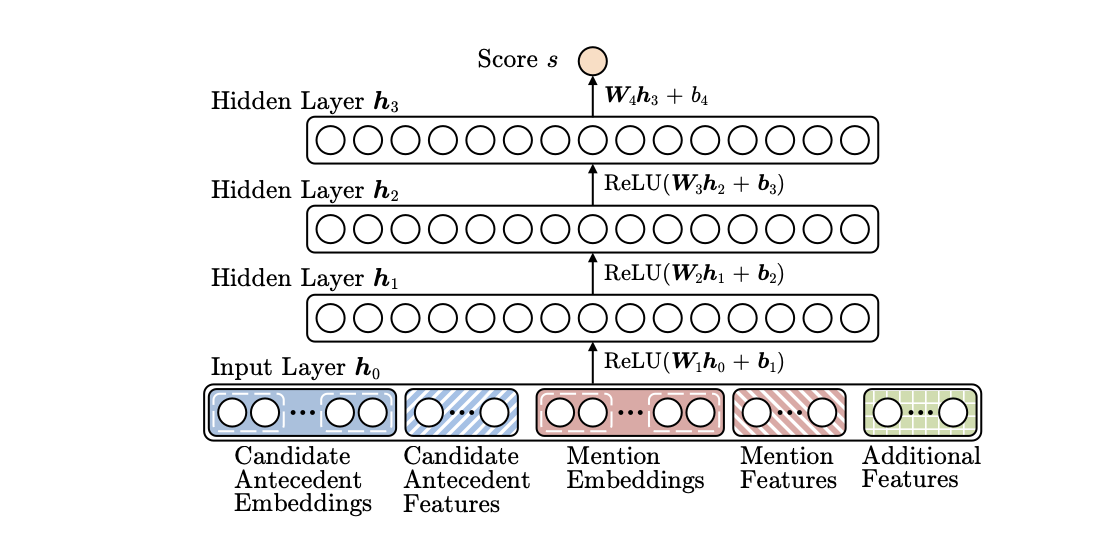

**bi-LSTM with attention**

Attention learns which words are important in a mention

[Kenton Lee et al. 2017 Jointly Predicting Predicates and Arguments
in Neural Semantic Role Labeling](https://www.semanticscholar.org/reader/7442a18a55f257a68f21d0cbb8b1395f8915a452)

- embedding layer: output pretrained word embedding + character embedding by CNN

- bi-LSTM layer: output hidden states for each word

- span representation layer: consider all possible span of a certain size. e.g., General, General Electric, General Electric said, ..., Electric, Electric said. only a subset of spans are shown in image for simplicity.

    embedding $g_i$ of span i, which is concatenation of 

    $$
    g_i = [h_{start(i)}, h_{end(i)}, \hat h_i, \phi(i)]
    $$

    span head $\hat h_i$ is weighted average of embeddings of word in the span calculated by attention mechanism, represent span

    $h_{start(i)}, h_{end(i)}$: hidden states from BI-LSTM of start word and end word of span, represent left and right context of span

    $\phi(i)$: represent other information not in the text

- output layer: score every span pairs to decide if they are coreferent mentions

    $$s(i, j)=s_m(i)+s_m(j)+ s_a(i, j)$$

    $s(i, j)$: are span i and j coreference mentions?

    $s_m(i)=w_m FFNN_m(g_i)$: is span i a mention?

    $s_a(i, j)=w_a FFNN_a([g_i, g_j, g_i \odot g_j, \phi(i, j)])$: is span i and j coreferent?




<img src='https://www.researchgate.net/publication/345262055/figure/fig1/AS:953992028909569@1604460832931/Overview-of-the-first-step-of-the-end-to-end-model-in-which-the-embedding-representations.ppm'/>

BERT-based: [Word-Level Coreference Resolution](https://arxiv.org/pdf/2109.04127.pdf)

- SpanBERT: better at span-based prediction tasks

- CorefQA task: Question: what is antecedent of a mention? A: a coreference link

- consider coreference links between individual words rather than spans and then reconstruct the word spans

## evaluation

metrics think of coreference as a clustering task

MUC (Message Understanding Conference) measures the number of links that need to be added or removed to transform the system output into the gold standard.

CEAF (Constrained Entity-Aligned F-measure) calculates the best alignment between system-produced entities and gold standard entities, and computes precision, recall, and F-measure based on this alignment.

LEA (Link-based Entity-Aware) calculates precision and recall for each entity separately, and then averages these scores.

B-CUBED (B³) calculates precision, recall, and F-measure for each mention in the document and then averages these scores.

BLANC (BiLateral Assessment of Noun-phrase Coreference) separately considers coreference and non-coreference links, and is thus able to assess system performance even when the mention detection is imperfect.

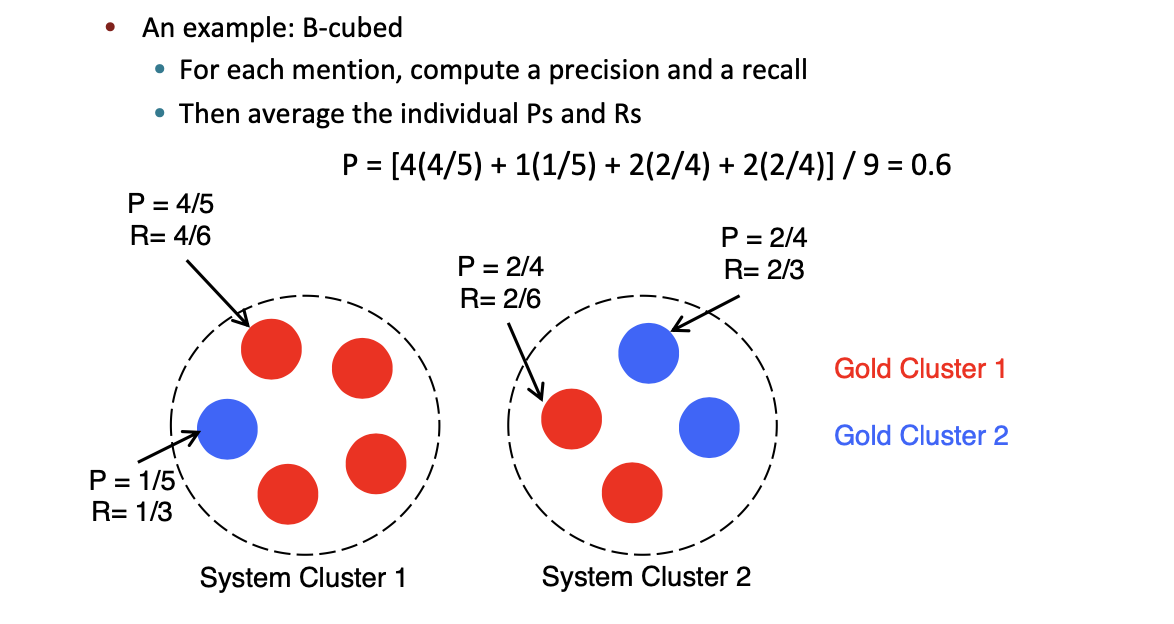